# Übung 3

**Gruppenname:**

*KSWS*

<font color='red'>Anmerkung: <br>
Aufgrund der genutzten Type Hints wird Python 3.9 oder hoeher zur
Ausfuehrung benoetigt.
</font>

### 3.1 Summary Statistics

Sie haben in der Vorlesung gesehen, dass *Summary Statistics* hilfreich sind, um erste Informationen über einen Datensatz zu erhalten und zusammenzufassen. In dieser Aufgabe werden Sie diese Techniken anwenden und untersuchen.

* Arbeiten Sie mit der Bibliothek *pandas*, die Sie in der letzten Übung kennengelernt haben. Dabei wird es auch darum gehen, Ihre Pandas Fertigkeiten zu festigen und zu vertiefen. Nutzen Sie auch Suchmaschinen und die Dokumentation von Pandas online, um die Befehle für die verschiedenen unten geforderten Arbeitsschritte herauszufinden.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/mysterious_data.csv).

### In dieser Übung ...

... werden Sie explorative Datenanalyse (EDA) kennenlernen und Prinzipien guter Visualisierung einsetzen. Nebenbei werden Sie mit den Software-Bibliotheken vertrauter, die Sie für Ihre Data Science Arbeiten nutzen.

In [1]:
# Dateipfade (relativ zum Uebungsblatt)
mysterious_data_path:str = "mysterious_data.csv"



**Ihre Aufgaben**

(1) Importieren Sie die oben angegebene Datei mithilfe von Pandas. Interpretieren Sie dabei die 0-te Spalte als Index. **Bitte visualisieren Sie die Daten zunächst nicht**! Zur Visualisierung kommen Sie noch im Schritt (6) dieser Übung.

In [80]:
import pandas as pd
import os
RessourcePath = "..\\Ressources" # Basis Pfad zum Ressourcen Ordner ( enthaelt die csv Dateien )
# Import and set index
mysterious_data_frame : pd.DataFrame = pd.read_csv( os.path.join(RessourcePath, mysterious_data_path) )
mysterious_data_frame                = mysterious_data_frame.set_index("dataset")

# Output
mysterious_data_frame.head()

,x,y
dataset,,
mystery,55.3846,97.1795
mystery,51.5385,96.0256
mystery,46.1538,94.4872
mystery,42.8205,91.4103
mystery,40.7692,88.3333


In [81]:
# Pandas Profiling ist ein Modul, welches eine detailliertere Statistic als pandas.describe
# in einer User GUI aufstellt. Auskommentieren Sie die folgenden Codezeilen fuer diese Zusatsstatistik
#import pandas_profiling
#mysterious_data_frame.profile_report()

(2) Ihr Index enthält die Bezeichnung verschiedener Datensätze. Wie viele verschiedenen Datensätze enthalten Ihre Daten und wie heißen diese? (kurze Angabe bzw. Ausgabe genügt)

In [82]:
data_set_names:list[str] = list(  mysterious_data_frame.index.unique() )
print( data_set_names )

['mystery', 'away', 'h_lines', 'v_lines', 'x_shape', 'star', 'high_lines', 'dots', 'circle', 'bullseye', 'slant_up', 'slant_down', 'wide_lines']


(3) Wie heißen Ihre Spalten?

In [83]:
print( list(mysterious_data_frame.columns) )

['x', 'y']


(4) Bestimmen Sie die Summary Statistics "[Mittelwert](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)" und "[Standardabweichung](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)" für jede Spalte eines jeden Datensatzes einzeln sowie den [Korrelationskoeffizienten](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) zwischen den beiden Spalten für jeden Datensatz und geben Sie diese drei Summary Statistics auf [zwei Nachkommastellen](https://pyformat.info/) genau an. 

In [84]:
def get_Statistics(data_frame : pd.DataFrame, columns: list )->list:
    '''Extrahiert Mittelwert, Standardabweichung und Korrelationskoeffizient

    Param:
        data_frame : pandas DataFrame
        columns    : Spalten, fuer welche die Statistik durchgefuert werden soll

    Returns:
        - Mittelwert
        - Standardabweichung
        - Korrelationskoeffizient
    '''
    mittelwert  : float = data_frame[columns].mean()
    stdabw      : float = data_frame[columns].std()
    korrelation : float = data_frame[columns].corr()

    return [mittelwert, stdabw, korrelation]

In [85]:
print("\n{:<2} | {:^10} | {:^18} | {:^13}\n".format("","Mittelwert","Standardabweichung","Korrelation"))
for data_set in data_set_names:
    print("{:<41}".format(data_set))
    subSet : pd.DataFrame = mysterious_data_frame[mysterious_data_frame.index==data_set]
    stats  : list         = get_Statistics(subSet,["x","y"])  
    print("{:<2} | {:^10.2f} | {:^18.2f} | {:^13.2f}".format("x",stats[0][0],stats[1][0],stats[2]["x"]["y"]))
    print("{:<2} | {:^10.2f} | {:^18.2f} | {:^13.2f}".format("y",stats[0][1],stats[1][1],stats[2]["y"]["x"]))
    print("------------------------------------------------")


   | Mittelwert | Standardabweichung |  Korrelation 

mystery                                  
x  |   54.26    |       16.77        |     -0.06    
y  |   47.83    |       26.94        |     -0.06    
------------------------------------------------
away                                     
x  |   54.27    |       16.77        |     -0.06    
y  |   47.83    |       26.94        |     -0.06    
------------------------------------------------
h_lines                                  
x  |   54.26    |       16.77        |     -0.06    
y  |   47.83    |       26.94        |     -0.06    
------------------------------------------------
v_lines                                  
x  |   54.27    |       16.77        |     -0.07    
y  |   47.84    |       26.94        |     -0.07    
------------------------------------------------
x_shape                                  
x  |   54.26    |       16.77        |     -0.07    
y  |   47.84    |       26.93        |     -0.07    
---------

(5) Unterscheiden sich die Datensätze in den Summary Statistics (zwei Nachkommastellen) aus Schritt (4)?

<font color='green'>ANTWORT: <br>
Alle Mittelwerte liegen bei x = 54.27 und y = 47.83 <br>
Die Standardabweichung liegt immer bei x = 16.77 und y = 26.94 <br>
Die Korrelationskoeffizienten variieren 
</font>

(6) Visualisierung: Erstellen Sie für jeden Datensatz **außer "mystery"** einen Scatter-Plot. Unterscheiden sich die Datensätze? Falls ja, gibt es große oder kleine Unterschiede? (1-5 Worte)

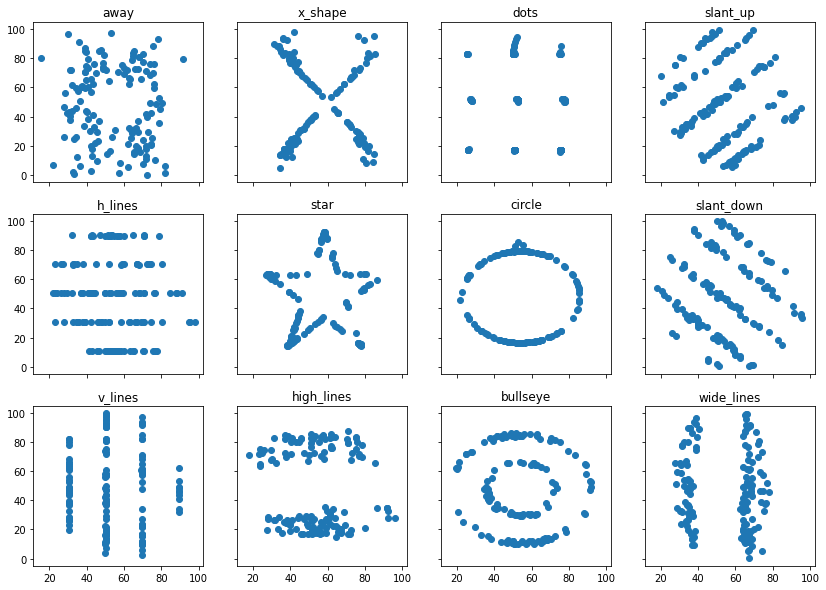

In [86]:
# Visualisierung der Datensätze als Punkte Plots um DataSnooping durch Annahmen zu vermeiden
import matplotlib.pyplot as plt


# Set up the plot
row_num:int = 3
col_num:int = 4
fig, ax     = plt.subplots(nrows  = row_num,
                           ncols  = col_num, 
                           sharex = True, 
                           sharey = True,
                           figsize=(14,10)
                           )
#fig.suptitle="Vergleich der Datenpunkte fuer die einzelnen 'datasets'"
fig_row:int = 0
fig_col:int = 0

# Plot the data without mystery set
no_mystery_data:list = data_set_names.copy()
no_mystery_data.remove("mystery")

for data_set in no_mystery_data:
    # Create a subset only holding the specified dataSet
    subSet : pd.DataFrame = mysterious_data_frame[mysterious_data_frame.index == data_set]

    # Create a scatter plot on the defined figure in a separate plot window
    ax[fig_row][fig_col].scatter(data = subSet, 
                                    x = "x", 
                                    y = "y" )
    ax[fig_row][fig_col].set(title=f"{data_set}")

    # Update the fig row and col
    fig_row += 1
    if (fig_row >= row_num  ):
        fig_col += 1
        fig_row  = 0
    

<font color='green'>ANTWORT: <br>
Es gibt große Unterschiede.
</font>

(7) Nehmen Sie sich die Folien zur heutigen Vorlesung zur Hand: Benennen Sie nun den Datensatz aus der Vorlesung, bei dem Sie ein ähnliches Phänomen beobachtet haben. (2 Worte)

<font color='green'>ANTWORT: <br>
Anscombes Quartett
</font>


(8) Visualisieren Sie nun den Datensatz **mystery** in einem Scatter-Plot.

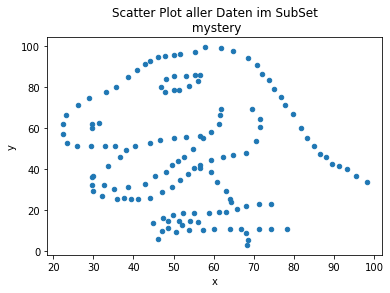

In [87]:
subSet : pd.DataFrame = mysterious_data_frame[mysterious_data_frame.index == "mystery"]
_ = subSet.plot.scatter(x="x",y="y",title=f"Scatter Plot aller Daten im SubSet\n mystery")

Damit darf ich Ihnen gratulieren. Sie haben gerade einen bekannten Datensatz kennengelernt. Wenn Sie mit der Übung fertig sind, dekodieren Sie die nachfolgende [ROT13-kodierte Nachricht](http://rot13.de/) und lesen Sie sie:

Uremyvpura Tyüpxjhafpu. Fvr unora fbrora qra "QngnFnhehf" ragqrpxg. Qvrfrf Trfpuöcs fgnzzg hefceüatyvpu iba Nyoregb Pnveb, qre na qre Havirefvgl bs Zvnzv Ivfhryyra Wbheanyvfzhf yrueg, haq gnhpugr mhz refgra Zny va rvarz Gjrrg iba Pnveb nhs: uggcf://gjvggre.pbz/nyoregbpnveb/fgnghf/765167969139765250/cubgb/1 

Frvar Zrffntr vfg xyne: Qba'g gehfg fhzznel fgngvfgvpf. Nyjnlf ivfhnyvmr lbhe qngn svefg. 

Qre QngnFnhehf ung rf vamjvfpura mh xyrvare Oreüuzgurvg reynatg. Uvagre qrz anpusbytraqra Yvax xöaara Fvr frura, jvr qre Qngrafngm, qra Fvr trenqr nanylfvreg unora, ragfgnaqra vfg: uggcf://jjj.nhgbqrfxerfrnepu.pbz/choyvpngvbaf/fnzrfgngf

### 3.2 Visualisierung Teil 1 (Weltgesundheit)

Die Visualisierung von Daten gehört zu den Tätigkeiten, die Sie als Data Scientist sehr häufig ausführen werden. Das Erstellen aussagekräftiger Abbildungen ist zeitintensiv, wird Ihnen aber mit wachsender Übung immer leichter fallen.

In dieser Übung werden Sie einen Datensatz visualisieren und interpretieren, der in den letzten Jahren oft diskutiert wurde. Sie werden untersuchen, wie es um die Gesundheit und den Wohlstand der Weltbevölkerung (zurzeit etwa 7,6 Milliarden Menschen) steht. Die Daten stammen aus unterschiedlichen Quellen und wurden von der gemeinnützigen Gapminder-Stiftung zusammengeführt, die es sich zum Ziel gemacht hat, Menschen mit Statistiken über den Zustand der Welt aufzuklären.

**Ihre Aufgaben**

(1) Führen Sie die unten angeführte Code-Zelle aus, um die Daten zu importieren.

In [3]:
from gapminder import gapminder

ModuleNotFoundError: No module named 'gapminder'

(2) Welche Spalten sind in Ihrem Datensatz enthalten? (kurze Liste der Spalten)

In [89]:
list(gapminder.columns)
#gapminder.profile_report()

['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap']

(3) Machen Sie eine Kurzrecherche und klären Sie für sich: Was ist "GDP"? Was bedeutet "per capita"? (1-2 Sätze)

<font color='green'>ANTWORT: <br>
GDP        : Gross domestic product, Bruttoinlandsprodukt <br>
per capita : pro Kopf
</font>

(4) Erstellen Sie eine Abbildung (Scatter-Plot), auf der Sie die Lebenserwartung (y-Achse) gegen GDP per capita (x-Achse) für jedes Land auftragen - *und zwar für das im Datensatz enthaltene neueste Jahr*. Skalieren Sie die x-Achse logarithmisch. Skalieren Sie die Größe der Punkte proportional zur Population des Landes.

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie gerne im Netz, wie Sie Pandas oder Matplotlib so verwenden können, damit Sie diese Aufgabe umsetzen können.

In [90]:
def plot_GDP_vs_pop(gapminder:pd.DataFrame, year:str):
    """Erzeugt fuer ein Jahr aus dem DataFrame einen Plot
    Param:
        - gapminder = gapminder dataframe
        - year         = Jahr 
    Plot:
    - x = GDP per Cap,
    - y = life Expectancy,
    - Markergröße = Population in 10^7
    """
    
    # Isoliere die Reihe fuer jedes Land, in welcher die groesste Jahreszahl steht
    Gdp_per_cap:pd.DataFrame    = gapminder[['country','gdpPercap',"lifeExp","pop"]][gapminder["year"]==year]

    # Fuege eine neue Spalte mit der umskalierten Populationsgroeße ein
    Gdp_per_cap["pop_per_10^7"] = Gdp_per_cap["pop"]/10000000

    # Visualisiere die Daten
    fig, ax = plt.subplots(1)
    _ = ax.scatter(data = Gdp_per_cap,
                    x = "gdpPercap",
                    y = "lifeExp",
                    s = "pop_per_10^7")
    _ = ax.set(
            xscale = "log",
            xlabel = "Bruttoinlandsprodukt ( log )",
            ylabel = "Maximale Lebenserwartung",
            title  = "Expected lifetime by Country Wealth")

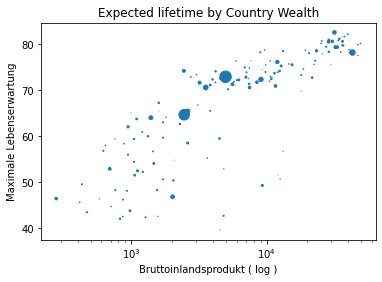

In [91]:
year  = gapminder["year"].max()
plot_GDP_vs_pop(gapminder,year)

(5) Interpretieren Sie Ihre Abbildung. Sehen Sie Zusammenhänge zwischen Lebenserwartung und GDP per Capita? (1-2 Sätze)

<font color='green'>ANTWORT: <br>
Für die logarithmische x-Achse ist ein grob linearer Zusammenhang erkennbar => <br>
ein logarithmische Zusammenhangzwischen der finanziellen Lage des Landes und der maximalen Lebenserwartung.
Es ist grob ein Trend zur Annährung an eine asymptotische Grenze für eine maximale Lebenserwartung zwischen 90 un 100 Erkennbar. <br>
Der visuelle Zusammenhang muss nicht einem logischen Sachzusammenhang entsprechen.
</font>

(6) Erweitern Sie Ihre Abbildung aus Schritt (4), in dem Sie die Informationen über die Kontinente integrieren: Identifizieren Sie zunächst die Kontinente, die im Datensatz angeführt werden. Färben Sie die Punkte der Länder gemäß Ihrer Kontinentzugehörigkeit ein. 

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie gerne im Netz, wie Sie Pandas oder Matplotlib so verwenden können, damit Sie diese Aufgabe umsetzen können.

In [92]:
import matplotlib.pyplot as plt
import numpy             as np 

def plot_Gdp_vs_pop_continent(gapminder:pd.DataFrame, year:str):
    # Isoliere die Reihe fuer jedes Land, in welcher die groesste Jahreszahl steht
    Gdp_per_cap:pd.DataFrame    = gapminder[['country','gdpPercap',"lifeExp","pop"]][gapminder["year"]==year]
    
    # Fuege eine neue Spalte mit der umskalierten Populationsgroeße ein
    Gdp_per_cap["pop_per_10^7"] = Gdp_per_cap["pop"]/10000000
    
    # Ordne durch einen Merge jeder Reihe den Kontinent zu
    kontinten_fuer_land   : pd.DataFrame = gapminder[['country',"continent"]].drop_duplicates('country')
    Gdp_per_cap_continent : pd.DataFrame = Gdp_per_cap.merge(kontinten_fuer_land, on='country')

    # Ordne jedem Kontinent eine eindeutige Farbe zu 
    continents : pd.core.series.Series   = kontinten_fuer_land["continent"].drop_duplicates()

    # Haendische Zuordnung, da sonst kleine Marker schwer zu erkennen sind
                                    #     Asia,   Europe,   Africa,  Americas, Oceania
    colors          : list[str]     = ["yellow"  ,"blue",   "green",   "black",   "red"]
    kontinent_color : dict[str,str] = dict(zip(continents,colors))
    
    # Alternative Farbzuordnung
    #cmap            = plt.get_cmap('tab10')
    #colors          = cmap(np.linspace(0, 1,len(continents) ))

    # Vergrößerung der Marker, da Länder mit niedriger Bevölkerung sonst nicht mehr sichtbar sind
    Gdp_per_cap_continent_scaled_up : pd.DataFrame    = Gdp_per_cap_continent.copy()
    Gdp_per_cap_continent_scaled_up["pop_per_10^7"]   = Gdp_per_cap_continent_scaled_up["pop_per_10^7"]*3

    # Fuer jeden Kontinent (key) wird ein eigener DataFrame (value) erstellt
    GDP_per_cap_continent_groups : pd.core.groupby.generic.DataFrameGroupBy = Gdp_per_cap_continent_scaled_up.groupby("continent")

    # Plot vorbereiten, damit alle Laender in einer Graphik angezeigt werden koennen
    fig,ax = plt.subplots(1,figsize=(9,9))

    # Iteriere ueber alle Teildataframes fuer die verschiedenen Kontinente
    for continent, continent_df in GDP_per_cap_continent_groups:
        ax.scatter(data  = continent_df,
                x     = "gdpPercap",  
                y     = "lifeExp",  
                s     = "pop_per_10^7",  
                c     = continent_df['continent'].map(kontinent_color),  
                label = continent )  

    # Setze die uebrigen Plot Parameter
    _ = ax.set(
            xscale = "log",
            xlabel = "Bruttoinlandsprodukt ( log )",
            ylabel = "Maximale Lebenserwartung",
            title  = "Expected lifetime by Country Wealth")

    legend = ax.legend()

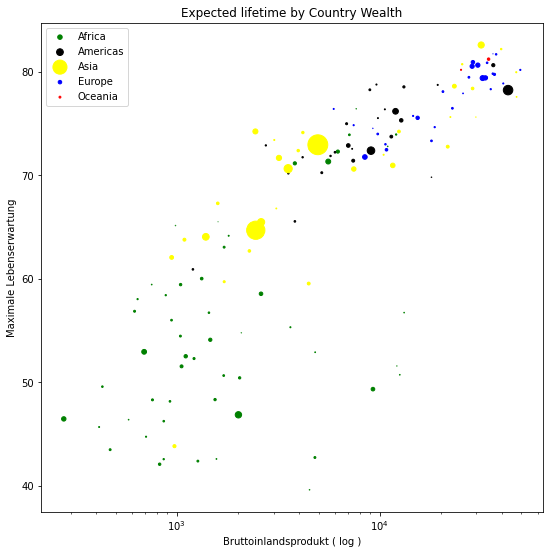

In [93]:
year  = gapminder["year"].max()
plot_Gdp_vs_pop_continent(gapminder,year)

(7) Interpretieren Sie Ihre Abbildung aus Schritt (6). Gibt es Tendenzen bezüglich der Kontinentzugehörigkeit der Länder? Falls ja, welche? (1-3 Sätze).

<font color='green'>ANTWORT: <br>
Europa und Amerika sind fast vollständig im oberen rechten viertel Vertreten - Wohlhabend und Langlebig. <br>
Währendessen ist Afrika im unteren linken viertel Vertreten - wenig Wohlhabend und kurzlebig. <br>
Fuer Afrika scheint es einen Trend zu einem niedrigeren Supremum fuer die Lebenserwartung zu geben. <br>
Oceania ist schwer zu erkennen, liegt jedoch dicht bei Europa. <br>
Asien ist eher in der Mitte Vertreten - mittel Langlebig und mittel Wohlhabend ( dabei ist die logarithmische Skalierung zu beachten)
</font>

(8) Erzeugen Sie eine neue Abbildung, die dieselben Informationen wie Ihre Abbildung in Schritt (6) zeigt, nur aus dem Jahr 1967. Vergleichen Sie diese Abbildung mit der aus Schritt (6). Was hat sich verändert und wie interpretieren Sie dies? (1-3 Sätze)

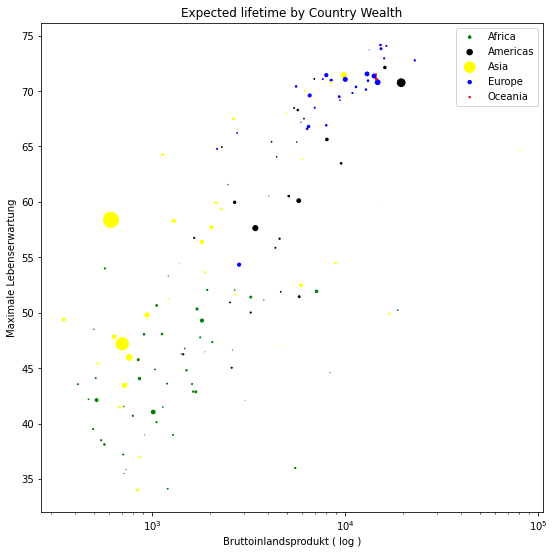

In [94]:
year = 1967
plot_Gdp_vs_pop_continent(gapminder,year)

<font color='green'>ANTWORT: <br>
Allgemein wird in der heutigen Zeit eine höhere Lebzeit erreicht. <br>
Europa, Amerika und Oceanien waren bereits 1967 wohlhabend und langlebig. <br>
Afrika ist wenig wohlhabend und wenig langlebig geblieben. <br>
Asien hat einen Aufschwung erlebt, da es 1967 eher im mittleren bis linken unteren Bereich vertreten war - wenig wohlhaben und wenig langlebig. <br>
</font>

(9) \[Optional\] Machen Sie Ihre Abbildung interaktiv. Nutzen Sie die `interact` Funktion, um eine Abbildung zu erzeugen, in der Sie mithilfe eines Reglers das Jahr einstellen können, für das die Abbildung erzeugt werden soll. Wie verändern sich Lebenserwartung und GDP per Capita über die Jahre hinweg? (1-3 Sätze)

* Hinweis: Um diese Teilaufgabe umzusetzen, recherchieren Sie im Netz und lesen Sie unter anderem [hier](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) nach, wie Sie `interact` nutzen können.

In [2]:
from __future__ import print_function
import ipywidgets as widgets

# Import um Matplotlib Warnung ueber unbeschriftete Legenden zu unterdruecken
import logging
logging.getLogger().setLevel(logging.CRITICAL)

# Konstanten
years       = gapminder["year"].drop_duplicates()
min_lifeExp = gapminder["lifeExp"].min()
max_lifeExp = gapminder["lifeExp"].max()
min_GPD     = 10e2
max_GPD     = 10e5

# Ordne jedem Kontinent eine eindeutige Farbe zu 
kontinten_fuer_land : pd.DataFrame = gapminder[['country',"continent"]].drop_duplicates('country')
continents                         = kontinten_fuer_land["continent"].drop_duplicates()
colors:list[str]                   = ["yellow"  ,"blue",   "green",   "black",   "red"]
kontinent_color:dict[str,str]      = dict(zip(continents,colors))

# Interaction function
def f(year,continent_choice):
    
    # Erzeuge den DataFrame fuer das Gewaehlte Jahr
    Gdp_per_cap           : pd.DataFrame   = gapminder[['country','gdpPercap',"lifeExp","pop"]][gapminder["year"]==year]
    Gdp_per_cap["pop_per_10^7"]            = Gdp_per_cap["pop"]/10000000
    Gdp_per_cap_continent : pd.DataFrame   = Gdp_per_cap.merge(kontinten_fuer_land, on='country')

    # Vergrößerung der Marker, da Länder mit niedriger Bevölkerung sonst nicht mehr sichtbar sind
    Gdp_per_cap_continet_scaled_up : pd.DataFrame  = Gdp_per_cap_continent.copy()
    Gdp_per_cap_continet_scaled_up["pop_per_10^7"] = Gdp_per_cap_continet_scaled_up["pop_per_10^7"]*3

    # Fuer jeden Kontinent wird eine getrennte Gruppe erstellt, um die Farb- und Labelzurodnung zu ermoeglichen
    continent_group:pd.core.groupby.generic.DataFrameGroupBy = Gdp_per_cap_continet_scaled_up.groupby("continent")
    
    #Plot vorbereiten, damit alle Laender in einer Graphik angezeigt werden koennen
    fig,ax = plt.subplots(1)
    fig.set_size_inches(7,7)
    
    for continent, continent_df in continent_group:
        
        if(continent in continent_choice):
            
            ax.scatter(data  = continent_df,
                          x  = "gdpPercap",  
                          y  = "lifeExp",  
                          s  = "pop_per_10^7",  
                          c  = continent_df['continent'].map(kontinent_color),  
                      label  = continent )  

        # Setze die uebrigen Parameter
        ax.set(title = f"Expected lifetime by Country Wealth {year}",
              xlabel = "GDP per Cap",
              ylabel = "Life Expectancy",
                xlim = [min_GPD,max_GPD],
                ylim = [min_lifeExp,max_lifeExp],
              xscale = "log")
        ax.legend()
        
print("Waehlen Sie ein oher mehrere Kontinente aus der Tabelle und waehlen Sie das Jahr über den Slider")
_ = widgets.interact( f, year=widgets.SelectionSlider(options=years),continent_choice=widgets.SelectMultiple(options=continents) )

NameError: name 'gapminder' is not defined

<font color='green'>ANTWORT: <br>
Werden die Länder einzeln Betrachtet so ist für alle Länder eine deutliche Entwicklung
zu einer höheren Lebenserwartung und einem höheren GDP zu beobachten.
</font>

### 3.3 Visualisierung Teil 2 (Geburtenraten)

In dieser Aufgabe werden Sie Ihre Fähigkeiten, Daten zu visualisieren, weiter verfeinern. Wir werden uns wieder Daten der Gapminder Stiftung anschauen.

* Da diese Übung an die obere Übung anschließt, gehe ich davon aus, dass Sie nun vertrauter mit der Visualisierung von Daten sind. Daher sind die Anweisungen in dieser Übungsaufgabe etwas freier gehalten.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/child_mortality_0_5_year_olds_dying_per_1000_born.csv) (Datensatz 1) und [hier](https://data.bialonski.de/ds/children_per_woman_total_fertility.csv) (Datensatz 2).

**Ihre Aufgaben**

(1) Importieren Sie die oben aufgeführten Datensätze.

In [96]:
child_mortality : pd.DataFrame = pd.read_csv( os.path.join(RessourcePath,"child_mortality_0_5_year_olds_dying_per_1000_born.csv") )
fertilily       : pd.DataFrame = pd.read_csv( os.path.join(RessourcePath, "children_per_woman_total_fertility.csv") )

(2) Interpretieren Sie die Dateinamen und schauen Sie in die Datensätze: Was enthalten Ihre Datensätze für Daten?

<font color='green'>ANTWORT: <br>
Interpretation: child mortality <br>
Die Steblichkeitsrate von 0 bis 5 Jährigen Kinder in einer Einheit von Verstorbenen pro 1000 Geburten. <br>
Interpretation: children per woman <br>
Anzahl der Geburten pro Frau <br> <br>
Nach der Betrachtung : <br>
Die beschriebenden Daten pro Land und Jahr - 1800 bis 2018
</font>

In [97]:
# Betrachtung der Datensätze
child_mortality.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9
2,Algeria,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,...,28.3,27.3,26.6,26.1,25.8,25.6,25.5,25.2,23.9,23.1
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.7,NaN,NaN
4,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,128.0,119.0,111.0,104.0,96.8,91.2,86.5,82.5,83.1,81.6


In [98]:
# Betrachtung der Datensätze
fertilily.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71
2,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.83,2.89,2.93,2.94,2.92,2.89,2.84,2.78,2.71,2.64
3,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.24,6.16,6.08,6.00,5.92,5.84,5.77,5.69,5.62,5.55
4,Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,...,2.15,2.13,2.12,2.10,2.09,2.08,2.06,2.05,2.04,2.03


(3) Erstellen Sie die erste Abbildung: Tragen Sie in einem Scatter-Plot die Kind-Überlebensrate (in Prozent) (y-Achse) gegen die Kinder pro Frau (x-Achse) für jedes aufgeführte Land für das Jahr 1965 ein.

In [99]:
YEAR:int = 1962

# Build the mortality dataframe
child_mortality_1962 : pd.DataFrame   = child_mortality[["country",str(YEAR)]].rename( columns = { str(YEAR) : "mortality" } )
child_mortality_1962["survival_perc"] = 1- ( child_mortality_1962["mortality"]/1000 )
child_mortality_1962                  = child_mortality_1962.drop(columns="mortality")
#child_mortality_1965.head()

In [100]:
# Build the fertility dataframe
fertility_1962                   = fertilily[["country",str(YEAR)]].rename( columns = { str(YEAR) : "children_per_woman" } )
#fertility_1962.head()

In [101]:
# Concatenate
fertiliy_mortality_1962 = fertility_1962.merge(child_mortality_1962, on = "country")
#fertiliy_mortality_1965.head()

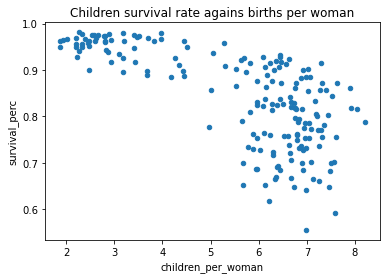

In [102]:
# Visualisierung
_ = fertiliy_mortality_1962.plot.scatter(x="children_per_woman",
                                         y="survival_perc",
                                     title="Children survival rate agains births per woman")

<font color='green'>ANTWORT: <br>
Allgemein scheint zu gelten: Bei wenigen Kindern pro Frau ist eine geringe Kindersterblichkeit zu erwarten.<br>
Bei vielen Kinder pro Frau ist die Varianz der Sterblichkeitsrate der Kinder größer.
</font>

(4) Erweitern Sie die Abbildung aus Schritt (3), indem Sie die Punkte des Scatterplots proportional zur Populationsgröße des jeweiligen Landes skalieren. Dazu werden Sie Informationen aus Übung 3.2 verwenden müssen.

In [103]:
# Erstelle einen DataFrame welcher nur Land und Population enthält
land_pop : pd.DataFrame  =  gapminder[["country","pop"]].copy()
# Es wurde hier copy genutzt, da Ansosten eine Warnung "SettingWithCopyWarning" geworfen wird
land_pop["pop_per_7k"]   =  land_pop["pop"]/10000000 
# Entferne Pop zur optimierung des Merge Outputs
land_pop = land_pop.drop(columns="pop")

In [104]:
# Merge den Datensatz über die Spalte countries mit der bekannten Populationsgroeße
fertiliy_mortality_1962 = fertiliy_mortality_1962.merge(land_pop,on="country")
fertiliy_mortality_1962.head()

,country,children_per_woman,survival_perc,pop_per_7k
0,Afghanistan,7.45,0.648,0.842533
1,Afghanistan,7.45,0.648,0.924093
2,Afghanistan,7.45,0.648,1.026708
3,Afghanistan,7.45,0.648,1.153797
4,Afghanistan,7.45,0.648,1.307946


In [105]:
def plot_mortality_vs_births(dataFrame:pd.DataFrame, ax, year:int):
    """Erzeugt einen Plot fuer die gegebene Achse fuer einen spezifischen DataFrame

    Param:
        dataFrame (pandas.DataFrame): DataFrame mit country,	children_per_woman,	survival_perc,	pop_per_7k
        ax (matplotlib.axes._subplots.AxesSubplot): Beliebige Matplotlib Achse
        year (int): Betrachtetes Jahr fuer die Beschriftung. 
    """
    _ = ax.scatter( data = dataFrame,
                      x = "children_per_woman",
                      y = "survival_perc",
                      s = "pop_per_7k")
    _ = ax.set(
                    xlim = [0,10],
                    ylim = [0.5,1],
                    title = f"Survival vs Birth {year}",
                    xlabel= "Geburten pro Frau",
                    ylabel= "Ueberlebensrate der Kinder")

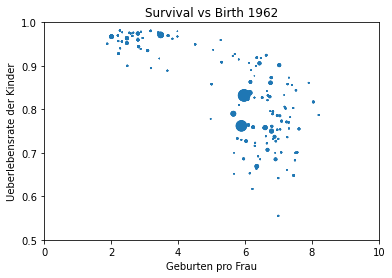

In [106]:
fig,ax = plt.subplots(1)
plot_mortality_vs_births(fertiliy_mortality_1962,ax,1962)

(5) Interpretieren Sie die Abbildung aus Schritt (4). Können Sie verschiedene Cluster von Ländern erkennen? (1-5 Sätze)

<font color='green'>ANTWORT: <br>
Es sind grob zwei Kluster unterscheidbar. <br>
1) Der obere linke Bereich - hier sind Frauen mit wenigen Geburten und niedriger Kindersterblichkeit zu sehen.
Die Länder haben eine niedrige bis mittlere Bevölkerungsdichte <br>
2) der gesammte rechte Bereich - hier sind Frauen mit vielen Geburten und hoher Varianz in der Kindersterblichkeit zu sehen. Die Länder haben eine stark gestreute Bevölkerungsdichte.
</font>

(6) Erstellen Sie eine weitere Abbildung wie in Schritt (4), allerdings für das Jahr 2018.

In [107]:
YEAR:int = 2007

# Erstelle den child_mortility data Frame
child_mortality_2007   : pd.DataFrame   = child_mortality[["country",str(YEAR)]].rename( columns={str(YEAR):"mortality"} )
child_mortality_2007["survival_perc"]   = 1 - (child_mortality_2007["mortality"]/1000)
child_mortality_2007                    = child_mortality_2007.drop(columns="mortality")

# Erstelle den Fertilitaets DataFrame
fertility_2007          : pd.DataFrame  = fertilily[["country",str(YEAR)]].rename( columns={str(YEAR):"children_per_woman"} )
fertiliy_mortality_2007 : pd.DataFrame  = fertility_2007.merge(child_mortality_2007,on="country")

# Erstelle einen DataFrame welcher nur Land und Population enthält
land_pop                : pd.DataFrame  = gapminder[["country","pop"]].copy()
land_pop["pop_per_7k"]                  =  land_pop["pop"]/10000000
land_pop                                = land_pop.drop(columns="pop")

# Merge den Datensatz über die Spalte countries mit der bekannter Populationsgroeße
fertiliy_mortality_2007                 = fertiliy_mortality_2007.merge(land_pop,on="country")



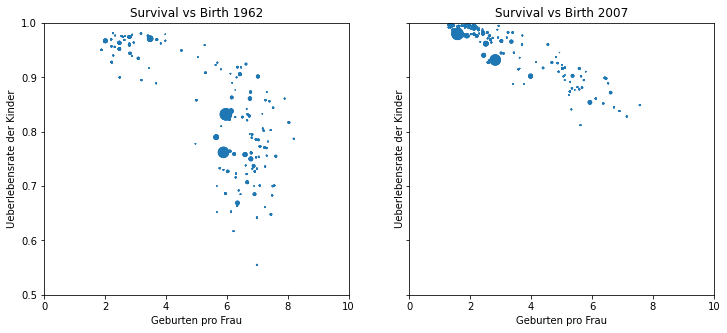

In [108]:
fig,ax = plt.subplots(1,2,sharex=True, sharey=True)
fig.set_size_inches(12,5)

plot_mortality_vs_births(fertiliy_mortality_1962,ax[0],1962)
plot_mortality_vs_births(fertiliy_mortality_2007,ax[1],2007)

(7) Vergleichen Sie Ihre Abbildungen aus Schritt (4) und Schritt (6): Wie haben sich die Daten verändert? Können Sie für das Jahr 2018 weiterhin Cluster erkennen? (1-5 Sätze)

<font color='green'>ANTWORT: <br>
Die durschnittliche Geburtenanzahl pro Frau scheint leicht gesunken zu sein. <br>
Die Sterblichkeitsrate von Kindern ist stark gesunken von max > 55 % auf max < 20 % <br> 
Länder mit großer Population sind nun fast nur noch bei 2 oder weniger Kinder mit
sehr geringer Sterblickeitsrate < 5 % vertreten.
</font>

(8) Ziehen Sie ein Fazit: Beschreiben Sie in wenigen Sätzen, was Sie aus den beiden Abbildungen lernen.

<font color='green'>ANTWORT: <br>
1) Bei niedriger Geburtenrate ist meist auch die Kindersterblichkeit niedrig
2) Im Jahre 1965 streute die Kindersterblichkeit bei hohen Geburtenraten start mit einem Maximum nahe 55%
3) Im Vergleich zu 1965 hat sich 2007 die Kindersterblichkeit allgemeins stark abgesenkt mit einem Maximum nahe 20%
</font>

### 3.4 Visualisierung Teil 3

Sie haben in den letzten beiden Aufgaben Daten der Gapminder Stiftung visualisiert. In dieser Aufgabe geht es darum, Daten selbstständig zu analysieren, zu visualisieren und Ihre Erkenntnisse aufzubereiten. 

**Ihre Aufgaben**

(1) Sofern noch nicht geschehen: Tun Sie sich mit einem Kollegen/einer Kollegin zusammen.

(2) Stöbern Sie gemeinsam in den Datenquellen der Gapminder Stiftung unter [https://www.gapminder.org/data/](https://www.gapminder.org/data/). (Scrollen Sie auf der verlinkten Seite weiter nach unten, um die Datensammlung zu sehen: "List of indicators in Gapminder Tools").

#### Idee 1

(3) Identifizieren Sie Datensätze, die Sie interessant finden. Führen Sie eine explorative Analyse durch, d.h. laden und importieren Sie die Daten, stellen Sie Fragen auf, und erstellen Sie entsprechende Visualisierungen, interpretieren Sie Ihre Befunde.

> Fragestellung: In den gapminder Datensätzen wurde der Zusammenhang zwischen finanziellen Wohlstand und
Lebenserwartung untersucht. Neben dem Bruttoinlandsprodukt ist auch die Arbeitslosigkeit 
ein Maß für den Wohlstand eines Landes. Daher wäre es interessant, ob
es zwischen den Gapminder Daten sowie der Langzeitarbeitslosigkeit einen Zusammenhang gibt.

In [109]:
unemployment_data : pd.DataFrame = pd.read_csv(os.path.join(RessourcePath,"long_term_unemployment_rate_percent.csv"))
unemployment_data.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.28,5.310,5.560,6.020,6.23,5.92,5.22,4.74,4.25,NaN
2,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.07,NaN,1.04,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.79,0.818,0.805,0.863,NaN,NaN,1.15,1.29,1.44,1.38
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.790,7.750,7.130,7.09,5.38,5.08,5.47,5.29,NaN


Betrachtung des Arbeitslosigkeits Datensatzes

In [110]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

xmin = unemployment_data.min(numeric_only=True).min()
xmax = unemployment_data.max(numeric_only=True).max()
years = np.arange(1990,2020,1)

def f(year):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(10,7)
    unemployment_data_year = unemployment_data[["country",str(year)]].rename( columns={str(year):"Arbeitlosigkeit"} )
    _ = ax.scatter(data=unemployment_data_year, x="Arbeitlosigkeit",y ="country" )
    _ = ax.set(yticks=[""],xlim=[xmin,50],xlabel="Arbeitslosigkeit",ylabel="Land")
    
    
_ = widgets.interact( f, year=widgets.SelectionSlider(options=years))

interactive(children=(SelectionSlider(description='year', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1…

> Mit den Jahren habe immer mehr Laender ihre Arbeitslosigkeitsquote offen gelegt.
> Allgemein gibt es einen Trend zu einer niedrigen Arbeitlosigkeit. Dies kann jedoch auch an der Offenlegung
der Quoten liegen. 

In [111]:
# Take data from 2007 and merge together
def merge_per_year(year):
    unemployment_data_year : pd.DataFrame = unemployment_data[["country", str(year)]]
    grouped_data_year      : pd.DataFrame = gapminder[gapminder["year"].isin([2007])].sort_values("country")
    data_year              : pd.DataFrame = pd.merge(unemployment_data_year, grouped_data_year, on="country")
    data_year.rename(columns={str(year):'unemployment'}, inplace=True)
    data_year.drop(columns="year",inplace=True)
    data_year                             = data_year.dropna()   
    return data_year

print("Data without nan rows: \n")
data_2007 = merge_per_year(2007)
data_2007.head()

Data without nan rows: 



,country,unemployment,continent,lifeExp,pop,gdpPercap
1,Albania,5.270,Europe,76.423,3600523,5937.029526
3,Australia,0.887,Oceania,81.235,20434176,34435.367440
4,Austria,1.070,Europe,79.829,8199783,36126.492700
5,Belgium,2.140,Europe,79.441,10392226,33692.605080
9,Bulgaria,2.330,Europe,73.005,7322858,10680.792820


In [112]:

years   = np.arange(1990,2020,1)
columns = ["lifeExp","pop","gdpPercap"]
xmax = unemployment_data.dropna().max(numeric_only=True).max()
def f(year,column):
    # Plot vorbereiten
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(14,7)  
    
    # Daten fuer das Gewaehlte Jahr isolieren
    unemployment_data_year = merge_per_year(year) 
    
    # Plot parameter setzten
    ymin    = gapminder[column].min()
    ymax    = gapminder[column].max()
    
    # Plot fuer die gewaehlte Spalte erzeugen
    ax[0].scatter(data=unemployment_data_year, x="unemployment",y = column )
    ax[0].set(xlim =[0,xmax], ylim=[ymin,ymax],xlabel="Arbeitslosigkeit",ylabel=str(column))
    
    # Statistik pro Kontinent
    mean_by_continent = unemployment_data_year.groupby("continent").mean()
    ax[1].scatter(data=unemployment_data_year,x="continent",y="unemployment",s=10,label="Countries")
    ax[1].scatter(mean_by_continent.index, mean_by_continent["unemployment"], c="r", label="Mean")
    ax[1].set(xlabel="Continents",ylabel="Arbeitslosigkeit",ylim=(0,xmax))
    ax[1].legend()
_ = widgets.interact( f, year=widgets.SelectionSlider(options=years), column=widgets.Select(options=columns) )

interactive(children=(SelectionSlider(description='year', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1…

> Es scheint keine klaren Zusammenhaenge zu geben

#### Idee 2

> Fragestellung: Neben der Verfügbarkeit von Nahrungsmitteln sind für das Ernährungsverhalten auch individuelle Entscheidungen über Einkauf, verzehrte Menge und Zubereitung auschlaggebend.
Es stellt sich die Frage, ob eine gute Grundbildung auch zu "gesunden" Entscheidungen im
Ernährungsverhalten beiträgt.
Da auf Gapminder nur begrenzt Daten zur verfügung stehen wurden die naheliegensten Datensätze für die
Fragestellung gewählt.
Als sehr "ungesunt" gilt ein hoher Zuckerkonsum,
die Bildung kann z.B. am Prozentsatz der Schulabschlüsse gemessen werden.
Daher wird hier der Zusammenhang zwischen den Datensätzen
>1) Prozentualer Anteil der abgeschlossenen Grundschule sowie
>2) der durchschnittlich Konsumierten Menge an Zucker verglichen


In [113]:
# Import der Datensätze
grundschulbildung: pd.DataFrame = pd.read_csv(os.path.join(RessourcePath,"primary_completion_rate_total_percent_of_relevant_age_group.csv"))
zuerernaehrung   : pd.DataFrame = pd.read_csv(os.path.join(RessourcePath,"sugar_per_person_g_per_day.csv"))

(3) Identifizieren Sie Datensätze, die Sie interessant finden. Führen Sie eine explorative Analyse durch, d.h. laden und importieren Sie die Daten, stellen Sie Fragen auf, und erstellen Sie entsprechende Visualisierungen, interpretieren Sie Ihre Befunde.

> Primäre Analyse Bildungsgrad <br>
> Welche Daten enthält der Datensatz? Über welche Zeiträume, Ausdehung (Global) etc.? <br>
> Gibt es Zeitliche oder Räumiche Tendenzen?

In [114]:
print(grundschulbildung.head())

                country  1970  1971  1972  1973  1974  1975  1976  1977  1978  \
0                 Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1           Afghanistan   NaN   NaN   NaN   NaN  16.7   NaN   NaN  17.9  19.7   
2                Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3               Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  United Arab Emirates   NaN   NaN   NaN   NaN  39.5  41.7  49.5  56.8  60.7   

   ...  2011  2012  2013   2014   2015  2016   2017   2018   2019   2020  
0  ...   NaN   NaN  96.6  101.0    NaN   NaN    NaN    NaN    NaN    NaN  
1  ...   NaN   NaN   NaN    NaN    NaN  80.5   84.4   85.6   84.3    NaN  
2  ...  46.2   NaN   NaN    NaN    NaN   NaN    NaN    NaN    NaN    NaN  
3  ...  93.0  98.7  89.5  101.0   98.9  99.9  102.0  102.0  103.0  101.0  
4  ...   NaN  93.9  95.7   99.1  104.0   NaN    NaN    NaN  112.0  105.0  

[5 rows x 52 columns]


In [115]:
xmin = grundschulbildung.min(numeric_only=True).min()
xmax = grundschulbildung.max(numeric_only=True).max()

def f(year):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(10,7)
    grundschulbildung_for_year = grundschulbildung[["country",str(year)]].rename( columns={str(year):"Grundschulabschluesse"} )
    _ = ax.scatter(data=grundschulbildung_for_year, x="Grundschulabschluesse",y ="country" )
    _ = ax.set(yticks=[""],xlim=[xmin,xmax],xlabel="Grundschulabschluesse",ylabel="Land")
    
    
_ = widgets.interact( f, year=widgets.SelectionSlider(options=years))

interactive(children=(SelectionSlider(description='year', options=(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1…

> Ueber die Jahre steigt der Anteil der Grundschulabschluesse pro Land immer weiter an

> Betrachtung der Zuckerernährung

<AxesSubplot:xlabel='Zuckerkonsum', ylabel='country'>

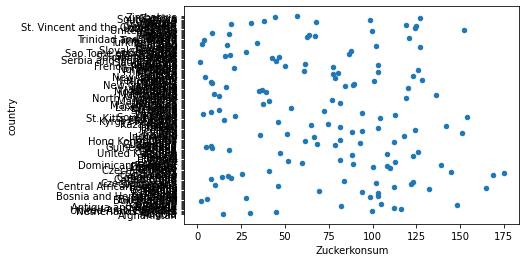

In [116]:
years = np.arange(1970,2020,1)
i = 5
zuerernaehrung_year = zuerernaehrung[["country",str(years[i])]].rename( columns={str(years[i]):"Zuckerkonsum"} )
zuerernaehrung_year.plot.scatter(x="Zuckerkonsum",y="country")

In [117]:
xmin = zuerernaehrung.min(numeric_only=True).min()
#xmax = zuerernaehrung.max(numeric_only=True).max()
xmax = 300
def f(year):
    fig, ax = plt.subplots(1)
    fig.set_size_inches(10,7)
    zuerernaehrung_year = zuerernaehrung[["country",str(year)]].rename( columns={str(year):"Zuckerkonsum"} )
    ax.scatter(data=zuerernaehrung_year, x="Zuckerkonsum",y ="country" )
    ax.set(yticks=[""],xlim=[xmin,xmax],xlabel="Zuckerkonsum",ylabel="Land")
    
    
_ = widgets.interact( f, year=widgets.SelectionSlider(options=years))

interactive(children=(SelectionSlider(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1…

> Der Konsum der einzelnen Länder verschiebt sich, es ist jedoch kein allgemeiner Trend erkennbar

Als naechstes wird der Zusammenhang zwischen Zuckerkonsum und Grundschulbildung durch
ein Stacken der DataFrames pro Jahr untersucht

In [118]:
# Zusammenfassung für plot pro Jahr
years = np.arange(1970,2018,1)
grundschulbildung_for_year       = grundschulbildung[["country",str(years[0])]].rename( columns={str(years[0]):"Grundschulabschluesse"} )
zuerernaehrung_year              = zuerernaehrung[["country",str(years[0])]].rename( columns={str(years[0]):"Zuckerkonsum"} )
zuerernaehrung_year["year"]      = years[0]
zucker_und_bildungsgrad          = zuerernaehrung_year.merge(grundschulbildung_for_year,on="country")
zucker_und_bildungsgrad          = zucker_und_bildungsgrad.dropna()
zucker_und_bildungsgrad_komplett = zuerernaehrung_year.merge(grundschulbildung_for_year,on="country")
zucker_und_bildungsgrad_komplett = pd.DataFrame()
for i in range(1,len(years)):

    grundschulbildung_for_year       = grundschulbildung[["country",str(years[i])]].rename( columns={str(years[i]):"Grundschulabschluesse"} )
    zuerernaehrung_year              = zuerernaehrung[["country",str(years[i])]].rename( columns={str(years[i]):"Zuckerkonsum"} )
    zuerernaehrung_year["year"]      = years[i]
    zucker_und_bildungsgrad          = zuerernaehrung_year.merge(grundschulbildung_for_year,on="country")
    zucker_und_bildungsgrad          = zucker_und_bildungsgrad.dropna()
    zucker_und_bildungsgrad_komplett = zucker_und_bildungsgrad_komplett.append(zucker_und_bildungsgrad)


In [119]:
zucker_und_bildungsgrad_komplett.head()

,country,Zuckerkonsum,year,Grundschulabschluesse
4,Argentina,118.00,1971,71.8
7,Austria,113.00,1971,95.0
10,Benin,8.90,1971,18.2
11,Burkina Faso,6.41,1971,7.2
13,Bulgaria,99.30,1971,96.8


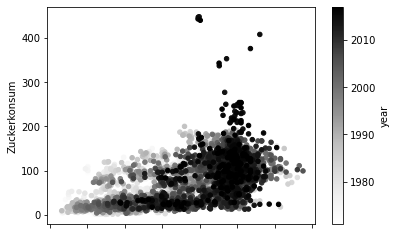

In [120]:
_ = zucker_und_bildungsgrad_komplett.plot.scatter(x="Grundschulabschluesse",y="Zuckerkonsum",c="year")

> Fazit
> Es ist über die Jare sowohl ein Trend zu einem höheren Zuckerkonsum als auch zu
eine höheren Bildungsgrad erkennbar. <br>
> Ein direkter Zusammenhang zwischen Zuckerkonsum und Bildungsgrad ist jedoch nicht erkennbar.
> Auffällig ist, dass bei niedrigem Bildungsgrad meist auch ein niedriger Zuckerkonsum auftritt.
Vermutlich besteht hier jedoch kein direkter Zusammenhang sonder ein gemeinsamer Zusammenhang mit
der finanziellen Lage des Landes. 

(4) Dokumentieren Sie Ihre explorative Analyse in diesem Jupyter Notebook und reichen Sie es bei ILIAS als Teamabgabe ein. 